In [1]:
# import modules
import math
import numpy as np
import matplotlib.pyplot as plt


## 1. Noise-free data

First, we implement the function `simulate_sir_simple(lam, mu, I_0, T)` function.

In [32]:
# define a function that takes the parameters and simulates the epidemy using the Euler forward scheme to day T
def simulate_sir_simple(lam, mu, I_0, T):
  """
  input:
    lam: the infection rate
    mu: the recovery rate
    I_0: the initial number of infected individuals
  output:
    X: the sequence of the number of additive susceptible individuals and the number of additive recovered individuals
  """
  # define the time step
  dt = 1
  # initialize the vectors for S, I and R
  I = []
  S = []
  R = []
  S_delta = []
  R_delta = []
  # set the initial conditions
  I.append(I_0)
  S.append(1-I_0)
  R.append(0)
  S_delta.append(0)
  R_delta.append(0)
  # simulate the epidemy
  for t in range(T):
    S.append(S[t] - dt*(lam*S[t] * I[t]))
    I.append(I[t] + dt*(lam*S[t] * I[t] - mu*I[t]))
    R.append(R[t] + dt*(mu*I[t]))
    if t > 0:
      S_delta.append(S[t-1] - S[t])
      R_delta.append(R[t] - R[t-1])
  # return the results
  return [(S_delta[n], R_delta[n]) for n in range(T)]

Then we run the simulation and visualize the results.

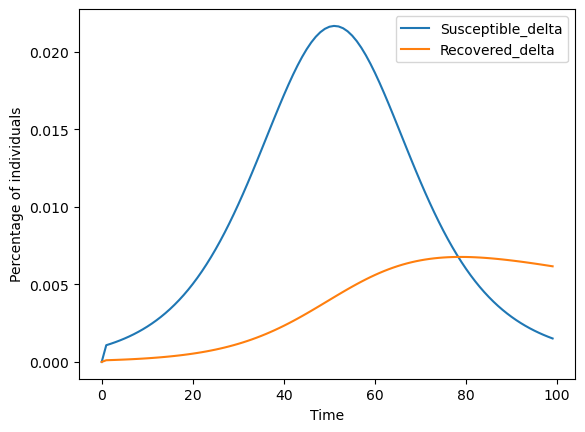

In [35]:
T = 100
# define the parameters
lam = 0.1
mu = 0.01
I_0 = 0.01

# simulate the epidemy
X = simulate_sir_simple(lam, mu, I_0, T)

# visualize the results
plt.figure()
plt.plot(X)
plt.xlabel('Time')
plt.ylabel('Percentage of individuals')
plt.legend(['Susceptible_delta', 'Recovered_delta'])

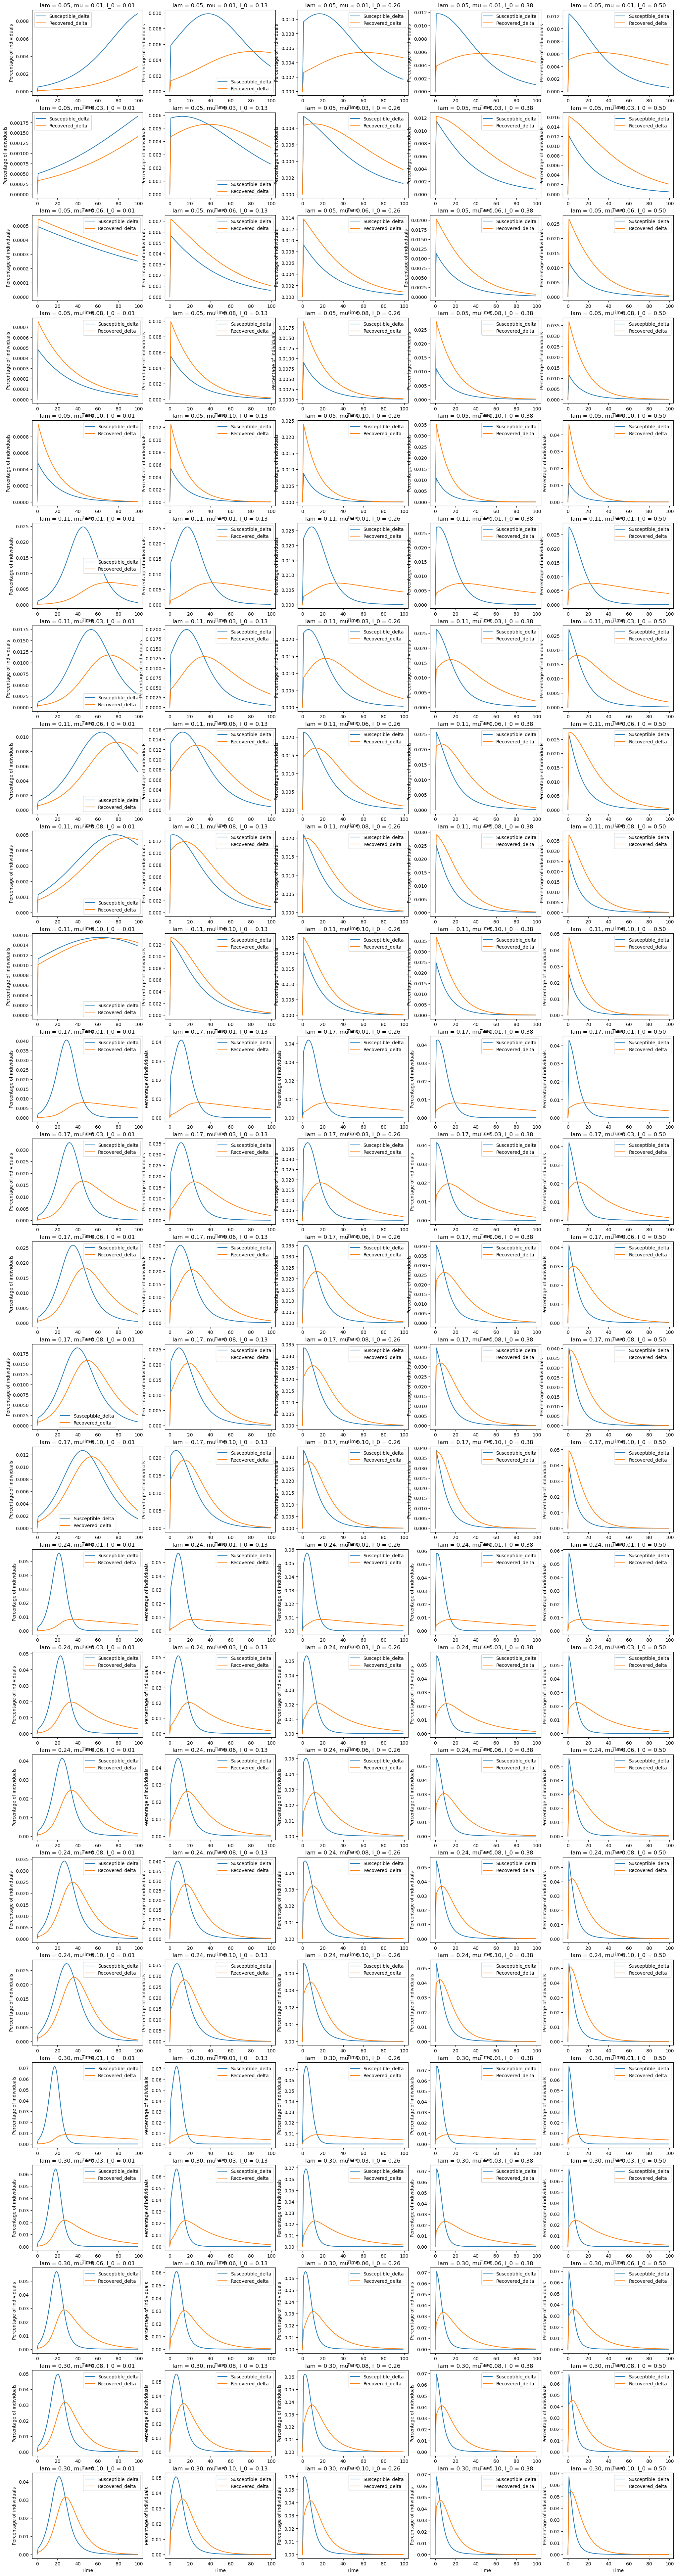

In [50]:
# Determine the suitable range of the parameters
num = 5
# define the parameters
lam = np.linspace(0.05, 0.3, num)
mu = np.linspace(0.01, 0.1, num)
I_0 = np.linspace(0.01, 0.5, num)

fig, axs = plt.subplots(num**2, num, figsize=(25, 20*num))
for i in range(len(lam)):
  for j in range(len(mu)):
    for k in range(len(I_0)):
      # simulate the epidemy
      X = simulate_sir_simple(lam[i], mu[j], I_0[k], T)
      # visualize the results in a 16*4 figure
      axs[i*num+j, k].plot(X)
      axs[i*num+j, k].set_xlabel('Time')
      axs[i*num+j, k].set_ylabel('Percentage of individuals')
      axs[i*num+j, k].legend(['Susceptible_delta', 'Recovered_delta'])
      axs[i*num+j, k].set_title('lam = {:.2f}, mu = {:.2f}, I_0 = {:.2f}'.format(lam[i], mu[j], I_0[k]))

plt.show()




4
